In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from torchvision import transforms, utils, datasets
from PIL import Image

### Loading Custom Dataset

In [7]:
train_data = datasets.ImageFolder("./data/TEST")
test_data = datasets.ImageFolder("./data/TRAIN")
print("Training Size:", len(train_data))
print("Testing Size:", len(test_data))

Training Size: 2908
Testing Size: 22564


In [24]:
print(train_data[0])
print(train_data.class_to_idx['N'])
print(train_data.class_to_idx)
print(train_data.classes)

(<PIL.Image.Image image mode=RGB size=361x280 at 0x26E328780A0>, 0)
0
{'N': 0, 'O': 1, 'R': 2}
['N', 'O', 'R']


### Visualize Applying Image Transforms

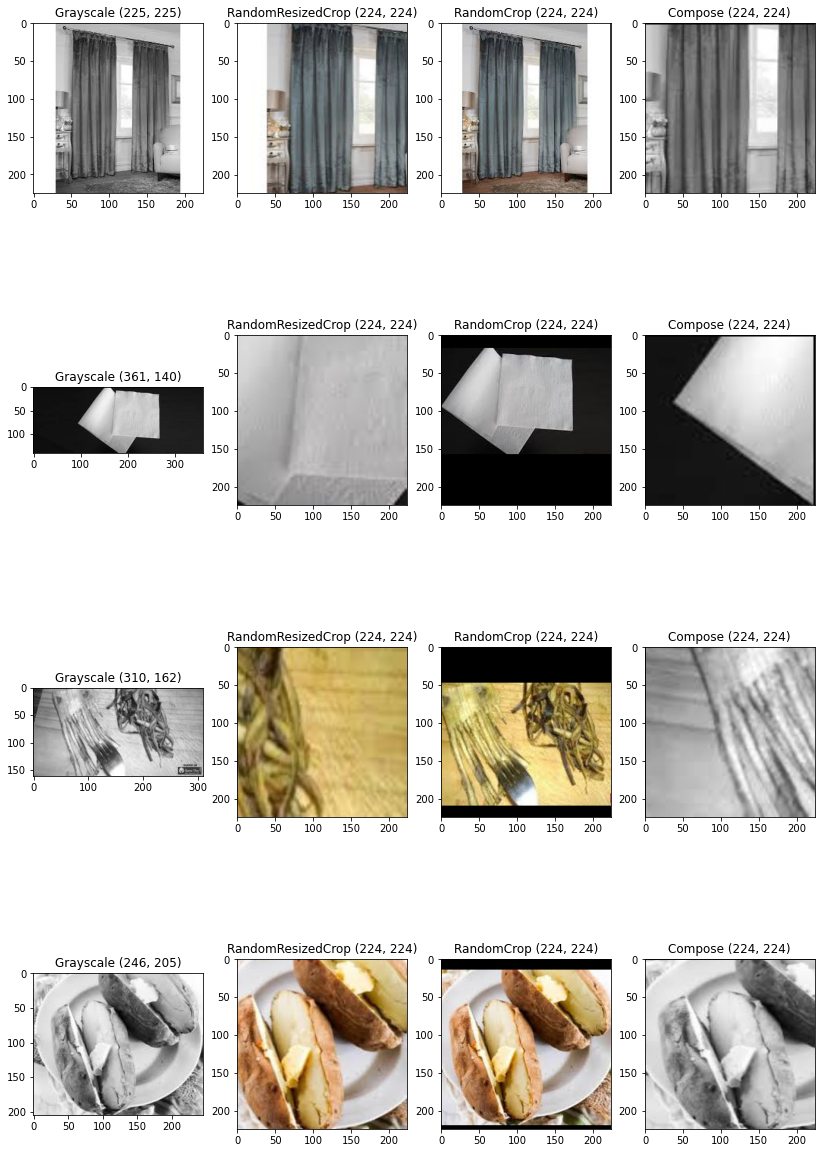

In [22]:
IMG_DIM = 224
gray = transforms.Grayscale(1)
scale = transforms.RandomResizedCrop(IMG_DIM)
crop = transforms.RandomCrop(IMG_DIM,padding=2, pad_if_needed=True)
composed = transforms.Compose([
    gray,
    scale,
    crop
])
# Apply each of the above transforms on sample.

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(14,22))
inds = np.random.randint(0,len(train_data),a)
for i in inds:
    sample, label = train_data[i]
    for j, tsfrm in enumerate([gray,scale, crop, composed]):
        transformed_sample = tsfrm(sample)

        ax = plt.subplot(a, b, c)
        ax.imshow(transformed_sample, cmap="gray")
        ax.set_title(f"{type(tsfrm).__name__} {transformed_sample.size}")
        c += 1

plt.show()